## Observations and Insights 

Markdown LaTex 

Markdown The data contained within the mouse data allows us to track each monuse individually on their treatment with each of the drugs in question. From the data we can we can see that Ramicane seemed to end up with the smallest average tumor size, but it can be difficult to ascertain if that makes it 'best' of the treatments as its somewhat a one-dimensional measurement.

We can see here that Capomulin had the largest sample size of mice to and also ends up with a similar range to Ramicane, which also had a significantly larger amount of mice on its regimen. From there we can probably surmise that those two are the front runners and would be the most likely to be effective, but further tests would be needed to determine if thats true. 

Additionally, Propriva had the smallest amount of mice available but also wasnt able to make the top 4 by tumor size, and could likely be cut from the running.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_set = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")
full_set

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
len(full_set['Mouse ID'].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = full_set[full_set.duplicated(['Mouse ID', 'Timepoint'])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
full_set.loc[full_set['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate = full_set[full_set["Mouse ID"]== 'g989'].index
full_set.drop(duplicate, inplace=True)

In [7]:
# Checking the number of mice in the clean DataFrame.
len(full_set['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
yeet = full_set.groupby('Drug Regimen')
reg_avg = yeet.mean()
reg_med = yeet.median()
reg_var = yeet.var()
reg_std = yeet.std()

reg_sem = yeet.sem()
summ_stats_df = reg_avg[["Tumor Volume (mm3)"]]
summ_stats_df = summ_stats_df.rename(columns ={"Tumor Volume (mm3)":"Average Volume (mm3)"})
summ_stats_df["Mean Volume (mm3)"] = reg_med["Tumor Volume (mm3)"]
summ_stats_df ["Variance"] = reg_var["Tumor Volume (mm3)"]
summ_stats_df ["Standard Deviation"] = reg_std["Tumor Volume (mm3)"]
summ_stats_df ['SEM'] = reg_sem["Tumor Volume (mm3)"]
summ_stats_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Average Volume (mm3),Mean Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

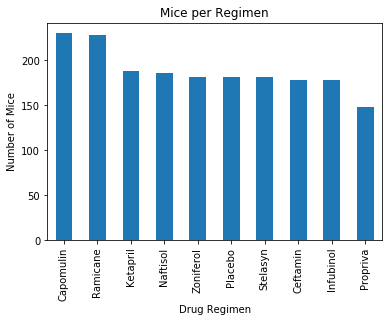

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drug_count = full_set["Drug Regimen"].value_counts()
drug_count_df = pd.DataFrame(drug_count)
drug_count_df
drug_chart = drug_count_df.plot(kind="bar", legend= False, title="Mice per Regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel('Number of Mice')

plt.show()

Text(0, 0.5, 'Number of Mice')

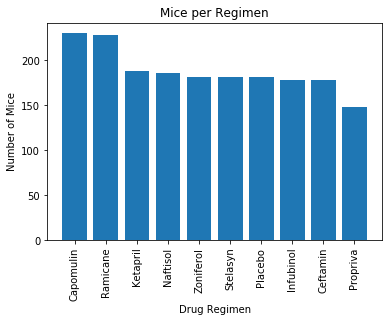

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
labels = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo','Infubinol', 'Ceftamin', 'Propriva']
x_axis = np.arange(len(drug_count_df))
number_mice = drug_count_df['Drug Regimen']

plt.bar(x_axis, number_mice,)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation=90)

plt.title("Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

## Pie Plots

Male      50.96
Female    49.04
Name: Sex, dtype: float64


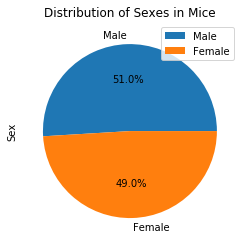

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count_df= pd.DataFrame(full_set['Sex'].value_counts())
percentages = round(sex_count_df['Sex']*100/sex_count_df['Sex'].sum(),2)
sex_chart = sex_count_df.plot(kind='pie', y='Sex', title="Distribution of Sexes in Mice",autopct='%1.1f%%',)
print(percentages)

Text(0.5, 1.0, 'Distribution of Sexes in Mice')

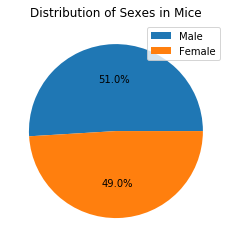

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Labels= ('Male', 'Female')

sex_plot = plt.pie(sex_count_df['Sex'], autopct='%1.1f%%')
plt.legend(Labels)
plt.title('Distribution of Sexes in Mice')

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
max_val = full_set.groupby(['Mouse ID']).max()
max_val = max_val.reset_index()

max_df = max_val[['Mouse ID', 'Timepoint']].merge(full_set, on=['Mouse ID', 'Timepoint'], how='left')

ceftamin = max_df.loc[max_df["Drug Regimen"]=="Ceftamin"]
ceftamin_vol=ceftamin["Tumor Volume (mm3)"]
ramicane = max_df.loc[max_df["Drug Regimen"]=="Ramicane"]
ramicane_vol=ramicane["Tumor Volume (mm3)"]
infubinol= max_df.loc[max_df["Drug Regimen"]=="Infubinol"]
infubinol_vol=infubinol["Tumor Volume (mm3)"]
capomulin = max_df.loc[max_df["Drug Regimen"]=="Capomulin"]
capomulin_vol=capomulin["Tumor Volume (mm3)"]
len(max_df)

248

In [19]:
# ceftamin
quartiles_cef = ceftamin_vol.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef


print(f"The lower quartile of tumor volume is: {lowerq_cef}")
print(f"The upper quartile of tumor volume is: {upperq_cef}")
print(f"The interquartile range of tumor volume is: {iqr_cef}")
print(f"The the median of tumor volume is: {quartiles_cef[0.5]} ")

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lower_bound_cef} could be outliers.")
print(f"Values above {upper_bound_cef} could be outliers.")
outlier_cef = ceftamin_vol.loc[(ceftamin_vol < lower_bound_cef) | (ceftamin_vol > upper_bound_cef)]
outlier_cef

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [20]:
quartiles_ram = ramicane_vol.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram= quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram


print(f"The lower quartile of tumor volume is: {lowerq_ram}")
print(f"The upper quartile of tumor volume is: {upperq_ram}")
print(f"The interquartile range of tumor volume is: {iqr_ram}")
print(f"The the median of tumor volume is: {quartiles_ram[0.5]} ")

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {lower_bound_ram} could be outliers.")
print(f"Values above {upper_bound_ram} could be outliers.")
outlier_ram = ramicane_vol.loc[(ramicane_vol < lower_bound_ram) | (ramicane_vol > upper_bound_ram)]
outlier_ram

The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

In [22]:
quartiles_inf = infubinol_vol.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf


print(f"The lower quartile of tumor volume is: {lowerq_inf}")
print(f"The upper quartile of tumor volume is: {upperq_inf}")
print(f"The interquartile range of tumor volume is: {iqr_inf}")
print(f"The the median of tumor volume is: {quartiles_inf[0.5]} ")

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {lower_bound_inf} could be outliers.")
print(f"Values above {upper_bound_inf} could be outliers.")
outlier_inf = infubinol_vol.loc[(infubinol_vol < lower_bound_inf) | (infubinol_vol > upper_bound_inf)]
outlier_inf

The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


31    36.321346
Name: Tumor Volume (mm3), dtype: float64

In [25]:
quartiles_naf = capomulin_vol.quantile([.25,.5,.75])
lowerq_naf = quartiles_naf[0.25]
upperq_naf = quartiles_naf[0.75]
iqr_naf = upperq_naf-lowerq_naf


print(f"The lower quartile of tumor volume is: {lowerq_naf}")
print(f"The upper quartile of tumor volume is: {upperq_naf}")
print(f"The interquartile range of tumor volume is: {iqr_naf}")
print(f"The the median of tumor volume is: {quartiles_naf[0.5]} ")

lower_bound_naf = lowerq_naf - (1.5*iqr_naf)
upper_bound_naf = upperq_naf + (1.5*iqr_naf)
print(f"Values below {lower_bound_naf} could be outliers.")
print(f"Values above {upper_bound_naf} could be outliers.")
outlier_cap = capomulin_vol.loc[(capomulin_vol < lower_bound_naf) | (capomulin_vol > upper_bound_naf)]
outlier_cap

The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


Series([], Name: Tumor Volume (mm3), dtype: float64)

[Text(0, 0, 'Ceftamin'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Capomulin')]

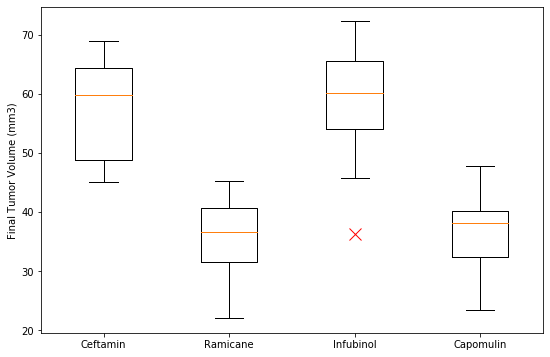

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#combine into set of lists 
plot_data = [ceftamin_vol, ramicane_vol, infubinol_vol, capomulin_vol]
#create figure
fig=plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
flierprops = dict(marker='x', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='r')
box1= ax.boxplot(plot_data, flierprops=flierprops)
flierprops='r'
plt.ylabel("Final Tumor Volume (mm3)")
ax.set_xticklabels(["Ceftamin", "Ramicane", "Infubinol","Capomulin"])

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

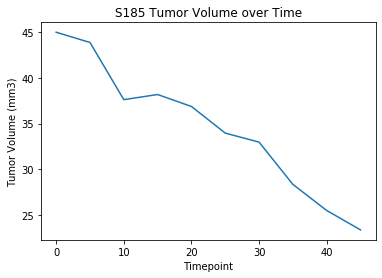

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_full = full_set[full_set["Drug Regimen"]== 'Capomulin']
s185_df = cap_full.loc[cap_full["Mouse ID"]=='s185']
s185_df

plt.plot(s185_df['Timepoint'], s185_df['Tumor Volume (mm3)'])
plt.title('S185 Tumor Volume over Time')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')

Text(0, 0.5, 'Average Tumor Volume')

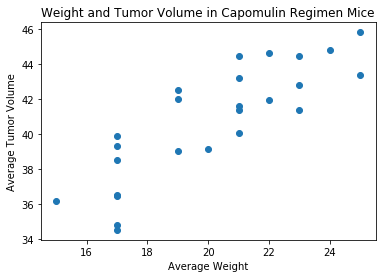

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_volume = cap_full.groupby('Mouse ID')
mean_volume = cap_volume.mean()
reset_mean = mean_volume.reset_index()
reset_mean
plt.scatter(reset_mean["Weight (g)"], reset_mean['Tumor Volume (mm3)'])
plt.title('Weight and Tumor Volume in Capomulin Regimen Mice')
plt.xlabel('Average Weight')
plt.ylabel('Average Tumor Volume')

## Correlation and Regression

The r-squared is: 0.7088568047708717


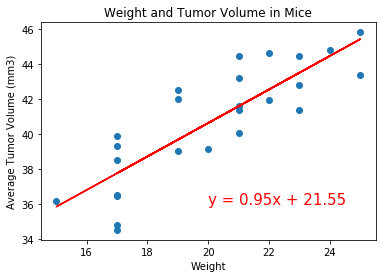

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = reset_mean['Weight (g)']
y_values = reset_mean['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.title('Weight and Tumor Volume in Mice')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()